# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [22]:
import pandas as pd

In [23]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"Smartphone": ["iPhone 11", "Samsung Galaxy S20", "Google Pixel 4", "LG V60", "Nokia 9", "Sony Xperia 1", "iPhone SE"], "Price": [700,1000,800,700,450,1000,399]})
sample_df

,Smartphone,Price
0,iPhone 11,700
1,Samsung Galaxy S20,1000
2,Google Pixel 4,800
3,LG V60,700
4,Nokia 9,450
5,Sony Xperia 1,1000
6,iPhone SE,399


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from the "Smartphone" column that have a value of 700 in the "Price" column.


Follow along with the **live coding activity** to see how this works.

In [24]:
# This code selects all values from the first column, "Smartphone" where the value on that same row in the second column, "Price" is equal to 700
#smartphone = sample_df["Smartphone"]
#price = sample_df["Price"]

#smartphone.loc[price == 700]


sample_df["Smartphone"].loc[sample_df["Price"] == 700]

0    iPhone 11
3       LG V60
Name: Smartphone, dtype: object

Now you try! Let's say you want to view some more expensive phones. Select all the values from the "Smartphone" column where the value on that same row in the "Price" column is equal to 1000.

In [25]:
sample_df["Smartphone"].loc[sample_df["Price"] == 1000]

1    Samsung Galaxy S20
5         Sony Xperia 1
Name: Smartphone, dtype: object

Let's say you definitely want an iPhone of some sort, but you want to see just iPhone prices. Now select all the values from the "Price" column where the value on that same row in the "Smartphone" column contains the word "iPhone".

In [26]:
sample_df.loc[sample_df["Smartphone"].str.contains("iPhone")]



,Smartphone,Price
0,iPhone 11,700
6,iPhone SE,399


Let's say you're on a budget and don't want to spend more than $700 on a phone. Select all the values from the "Smartphone" column where the value on that same row in the "Price" column is less than or equal to 700.

In [27]:
sample_df[["Price","Smartphone"]].loc[sample_df["Price"] <= 700]

,Price,Smartphone
0,700,iPhone 11
3,700,LG V60
4,450,Nokia 9
6,399,iPhone SE


#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [28]:
# You will need to import numpy
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.colors as mpl

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# You can use this function in your code to find the log of distance:
df = pd.read_csv("/content/drive/My Drive/unit 3 amnh/oh_table.csv")


In [31]:
alpha_persei = df.loc[df["group_id"] == 1]

In [32]:
alpha_persei.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
151,4215,230386718682382976,TYC 2885-2209-1,60.473140,41.727862,6.5020,155.458,10.276,9.380,NaN,NaN,NaN,1,125
152,4381,231698848371132032,HIP 18507,59.357595,43.316188,7.2032,140.343,7.372,7.240,NaN,NaN,NaN,1,125
153,4418,231907240183865600,HIP 18640,59.852732,44.481590,6.1964,162.826,7.930,7.642,NaN,NaN,NaN,1,125
154,4439,232078592199612416,TYC 2886-2075-1,62.971059,42.749205,6.8740,146.798,8.823,7.987,NaN,NaN,NaN,1,125
155,4447,232143188507760128,TYC 2890-2306-1,63.436792,43.566124,6.5555,154.674,10.054,9.090,NaN,NaN,NaN,1,125


In [33]:
G_value = alpha_persei["G"]

J_value = alpha_persei["J"]

# assigned G column to a variable 

In [34]:
distance = alpha_persei["distance"]

# assign distance column to a variable 

In [35]:
np.log10(alpha_persei["distance"])

151    2.191613
152    2.147191
153    2.211724
154    2.166720
155    2.189417
         ...   
271    2.291786
272    2.226053
273    2.251154
274    2.270879
275    2.243395
Name: distance, Length: 125, dtype: float64

In [36]:
#absolute magnitude = G - 5 * log(distance) + 5

absolute_magnitude = G_value - 5 * np.log10(alpha_persei["distance"]) +5

In [37]:
color_magnitude = G_value - J_value

In [38]:
sunJ = 3.64
sunG = 5.12

sun_color_magnitude = sunG - sunJ

sun_absolute_magnitude = sunJ - 5 * np.log10(0.0000049215) + 5






### Coding Challenge 1: Add the sun to your color magnitude diagram

### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


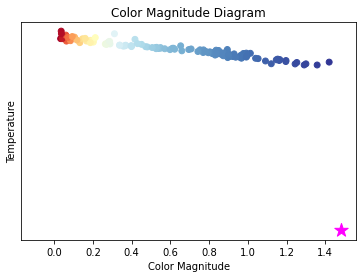

In [44]:
cm = plt.cm.get_cmap("RdYlBu")# This is the colormap we'll use for our data points. Note: _r reverses the colormap
plt.scatter(color_magnitude, absolute_magnitude, c=color_magnitude, s=35, cmap=cm, norm=mpl.LogNorm()) # This plots all our points as a scatterplot
plt.scatter(sun_color_magnitude, sun_absolute_magnitude, c='magenta', s=200, marker='*') # This plots the sun's data as a separate point with a star marker


plt.ylim([-2, 37])
#plt.yscale("log")
plt.yticks(range(-2,))

plt.xlabel('Color Magnitude')
plt.ylabel('Temperature')
plt.title('Color Magnitude Diagram')


plt.gca().invert_yaxis() # This inverts the x axis so that the hottest stars are on the left.
plt.show()



### Coding Challenge 2: Add a colormap to your diagram

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


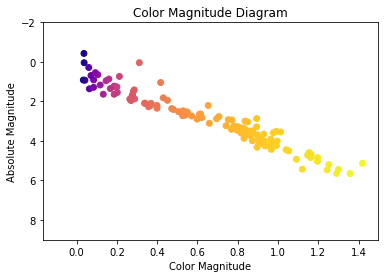

In [64]:
cm = plt.cm.get_cmap("plasma")# This is the colormap we'll use for our data points. Note: _r reverses the colormap
plt.scatter(color_magnitude, absolute_magnitude, c=color_magnitude, s=35, cmap=cm, norm=mpl.LogNorm()) # This plots all our points as a scatterplot


plt.ylim([-2, 9])


plt.xlabel('Color Magnitude')
plt.ylabel('Absolute Magnitude')
plt.title('Color Magnitude Diagram')


plt.gca().invert_yaxis() # This inverts the x axis so that the hottest stars are on the left.
plt.show()


### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

In [56]:
min(color_magnitude)
max(color_magnitude)

1.42

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


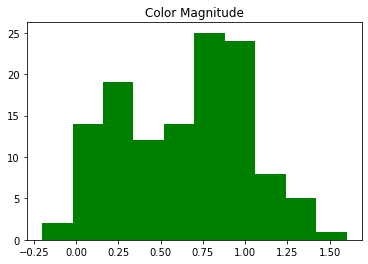

In [62]:
plt.hist(color_magnitude, 10, (-.20, 1.6), color="g")
plt.xlim(-.1, 1.6)
plt.title("Color Magnitude")
plt.show()

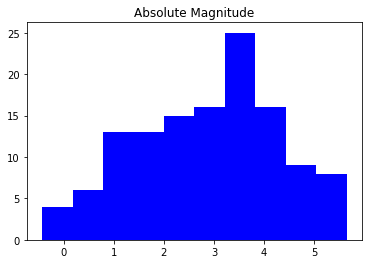

In [63]:
plt.hist(absolute_magnitude, 10, color = "b")
plt.title("Absolute Magnitude")
plt.show()